# **Problem Statement**
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [99]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
df_train = pd.read_csv('/content/BlackFriday.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [39]:
df_test = pd.read_csv('/content/test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [40]:
##Merge both train and test data
# Replace df_train.append(df_test) with pd.concat([df_train, df_test])
df = pd.concat([df_train, df_test])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


# **Basic Operations**

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 771176 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     771176 non-null  int64  
 1   Product_ID                  771176 non-null  object 
 2   Gender                      771176 non-null  object 
 3   Age                         771176 non-null  object 
 4   Occupation                  771176 non-null  int64  
 5   City_Category               771176 non-null  object 
 6   Stay_In_Current_City_Years  771176 non-null  object 
 7   Marital_Status              771176 non-null  int64  
 8   Product_Category_1          771176 non-null  int64  
 9   Product_Category_2          531846 non-null  float64
 10  Product_Category_3          235315 non-null  float64
 11  Purchase                    537577 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 76.5+ MB


In [42]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.711760e+05,771176.000000,771176.000000,771176.000000,531846.000000,235315.000000,537577.000000
mean,1.003003e+06,8.083527,0.409183,5.289790,9.844400,12.669724,9333.859853
std,1.718156e+03,6.523215,0.491683,3.746377,5.089586,4.124816,4981.022133
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001501e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003042e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004438e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [43]:
df.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category_1,int64
Product_Category_2,float64


In [44]:
df.shape

(771176, 12)

In [45]:
df.drop(['User_ID'], axis=1, inplace=True)

In [46]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [47]:
#Use of map function

df['Gender'] = df['Gender'].map({'F':0, 'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [48]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [49]:
# Endoding using map function

df['Age'] = df['Age'].map({'0-17':1,'18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [50]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [51]:
df['City_Category'] = df['City_Category'].map({'A':1, 'B':2, 'C':3})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,1,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,1,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,3,4+,0,8,NaN,NaN,7969.0


# **Missing Values**

In [52]:
df.isnull().sum()

,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,239330
Product_Category_3,535861


In [53]:
df['Product_Category_2'].value_counts()

,count
Product_Category_2,
8.0,90287
14.0,77884
2.0,69762
16.0,61034
15.0,53576
5.0,36804
4.0,36253
6.0,23360
11.0,20041


In [65]:
print(df['Product_Category_2'].unique())
print(df['Product_Category_2'].isnull().sum())
print(df['Product_Category_2'].dtype)

[None]
771176
object


In [66]:
# Calculate mode of the column
mode_series = df['Product_Category_2'].mode()

# Check if mode exists before filling
if not mode_series.empty:
    df['Product_Category_2'] = df['Product_Category_2'].fillna(mode_series[0])
else:
    print("No mode found. Column might be empty or contain only NaNs.")


<ipython-input-66-15b91b949bca>:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Product_Category_2'] = df['Product_Category_2'].fillna(0)  # or any other default value


In [67]:
df['Product_Category_2'].isnull().sum()

np.int64(0)

In [68]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [69]:
df['Product_Category_3'].value_counts()

,count
Product_Category_3,
16.0,45981
15.0,39566
14.0,25976
17.0,23565
5.0,23521
8.0,17683
9.0,16367
12.0,12963
13.0,7775


In [70]:
## Replace the missing values with mode
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [71]:

df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,0,16.0,8370.0
1,P00248942,0,1,10,1,2,0,1,0,14.0,15200.0
2,P00087842,0,1,10,1,2,0,12,0,16.0,1422.0
3,P00085442,0,1,10,1,2,0,12,0,16.0,1057.0
4,P00285442,1,7,16,3,4+,0,8,0,16.0,7969.0


In [72]:
df.shape

(771176, 11)

In [73]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [79]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,0,16.0,8370.0
1,P00248942,0,1,10,1,2,0,1,0,14.0,15200.0
2,P00087842,0,1,10,1,2,0,12,0,16.0,1422.0
3,P00085442,0,1,10,1,2,0,12,0,16.0,1057.0
4,P00285442,1,7,16,3,4,0,8,0,16.0,7969.0


In [80]:
#Convert Object into INT
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 771176 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  771176 non-null  object 
 1   Gender                      771176 non-null  int64  
 2   Age                         771176 non-null  int64  
 3   Occupation                  771176 non-null  int64  
 4   City_Category               771176 non-null  int64  
 5   Stay_In_Current_City_Years  771176 non-null  int64  
 6   Marital_Status              771176 non-null  int64  
 7   Product_Category_1          771176 non-null  int64  
 8   Product_Category_2          771176 non-null  int64  
 9   Product_Category_3          771176 non-null  float64
 10  Purchase                    537577 non-null  float64
dtypes: float64(2), int64(8), object(1)
memory usage: 70.6+ MB


# **Visualization**

<Axes: xlabel='Age', ylabel='Purchase'>

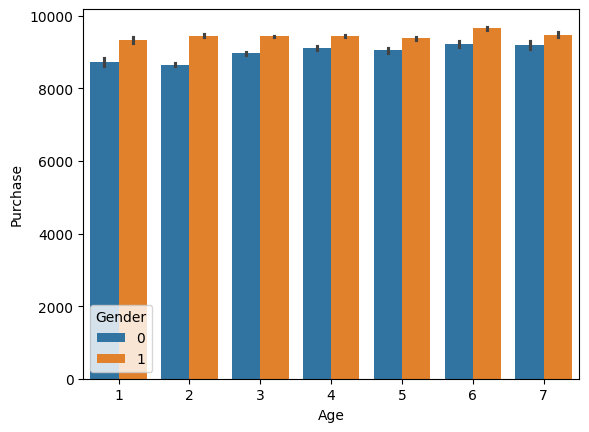

In [82]:
sns.barplot(x='Age', y='Purchase', hue='Gender', data=df)


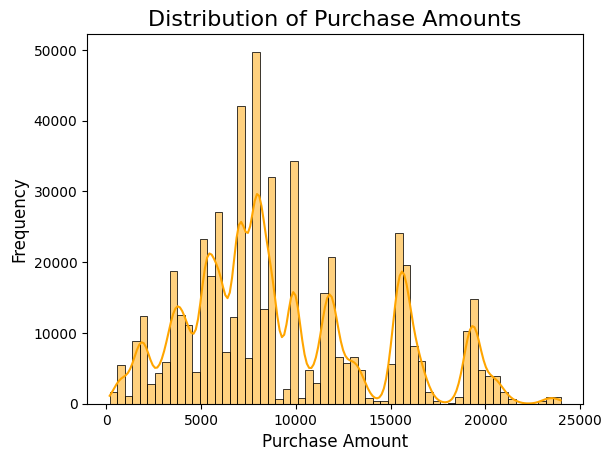

In [91]:
sns.histplot(df['Purchase'], kde=True, color='orange', bins=60)
plt.title('Distribution of Purchase Amounts', fontsize=16)
plt.xlabel('Purchase Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# **Feature Scaling**

In [93]:
##Feature Scaling
df_test=df[df['Purchase'].isnull()]
df_train=df[~df['Purchase'].isnull()]
X=df_train.drop('Purchase',axis=1)
X.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,P00069042,0,1,10,1,2,0,3,0,16.0
1,P00248942,0,1,10,1,2,0,1,0,14.0
2,P00087842,0,1,10,1,2,0,12,0,16.0
3,P00085442,0,1,10,1,2,0,12,0,16.0
4,P00285442,1,7,16,3,4,0,8,0,16.0


In [95]:
y=df_train['Purchase']
y.shape

(537577,)

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [97]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [98]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)